# **Baseball Exploratory Data Project**

I discovered Baseball when I was about 13 years old. I had asked for an Xbox and games for Christmas and I got exactly that. One of those games was MVP Baseball 2005, arguably the most popular baseball video game of that decade. I did not know I liked baseball until I started playing it on my Xbox and fell in love with it. After that, I asked my parents if I could join a team in my city and, since then, baseball has been my favorite sport to watch and play.

## **Why Baseball Data?**

Baseball is a sport that generates an immense amount of data, spanning decades of games, players, and teams. From batting averages to pitcher ERAs, from home runs to stolen bases, each statistic tells a story about the game and the players who inhabit it. Analyzing this data offers valuable insights into individual and team performance. It also provides a fascinating glimpse into the evolution of the sport over time.

## **Project Objectives**

The primary objective of this exploratory data analysis project is to gain a deeper understanding of the different Python libraries used to analyze data such as Pandas, Matplotlib and Seaborn.

1. **Evaluate Pandas Functionality:** Assess the various functionalities and capabilities of the Pandas library for data manipulation, including data loading, cleaning, filtering, aggregation, and transformation. Explore different methods for indexing, slicing, and reshaping data to gain proficiency in working with tabular data structures.

2. **Visualize Data Using Matplotlib:** Explore the visualization capabilities of Matplotlib for creating static plots and charts. Experiment with different plot types such as line plots, scatter plots, bar plots, histograms, and box plots to effectively communicate insights from data. Evaluate customization options for enhancing the clarity and aesthetics of visualizations.

3. **Utilize Seaborn for Advanced Visualization:** Dive deeper into data visualization techniques using Seaborn, a powerful library built on top of Matplotlib. Investigate Seaborn's specialized functions for statistical visualization, including scatterplot matrices, violin plots, pair plots, and heatmaps. Compare Seaborn's capabilities with those of Matplotlib and identify scenarios where Seaborn provides added value.

## **About the Data**

- This data is from the 2018 MLB Season.
- I got all data-sets from the book 'Learn to Code with Baseball' written by Nathan Braun. You can check it out [here](https://www.codebaseball.com/).

In [47]:
# Default imports
import pandas as pd

In [48]:
# Loop to Read each csv file we are going to use

def read_csvs(files: list[str]) -> list[pd.DataFrame]:
    data_files: list[pd.DataFrame] = []
    for file in files:
        data_files.append(pd.read_csv(file))
    return data_files

data = read_csvs(['./data/games.csv', './data/players.csv', './data/teams.csv' ])

games, players, teams = data

In [49]:
players

,name,bats,throws,height,weight,playerID,birthYear,birthMonth,birthDay,birthCity,birthState,birthCountry,debut
0,Jose Abreu,R,R,75.0,255.0,abreujo02,1987,1,29,Cienfuegos,Cienfuegos,Cuba,20140331
1,Ronald Acuna,R,R,72.0,180.0,acunaro01,1997,12,18,La Guaira,Vargas,Venezuela,20180425
2,Willy Adames,R,R,72.0,200.0,adamewi01,1995,9,2,Santiago,Santiago,D.R.,20180522
3,Matt Adams,L,R,75.0,245.0,adamsma01,1988,8,31,Philipsburg,PA,USA,20120520
4,Jim Adduci,L,L,74.0,210.0,adducji02,1985,5,15,Burnaby,BC,CAN,20130901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,Brandon Workman,R,R,77.0,235.0,workmbr01,1988,8,13,Arlington,TX,USA,20130710
821,Mike Wright,R,R,78.0,215.0,wrighmi01,1990,1,3,Bennettsville,SC,USA,20150517
822,Steven Wright,R,R,74.0,215.0,wrighst01,1984,8,30,Torrance,CA,USA,20130423
823,Ryan Yarbrough,R,L,77.0,205.0,yarbrry01,1991,12,31,Lakeland,FL,USA,20180331


In [50]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          825 non-null    object 
 1   bats          825 non-null    object 
 2   throws        825 non-null    object 
 3   height        825 non-null    float64
 4   weight        825 non-null    float64
 5   playerID      825 non-null    object 
 6   birthYear     825 non-null    int64  
 7   birthMonth    825 non-null    int64  
 8   birthDay      825 non-null    int64  
 9   birthCity     825 non-null    object 
 10  birthState    792 non-null    object 
 11  birthCountry  825 non-null    object 
 12  debut         825 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 83.9+ KB


In [51]:
# Renaming columns

columns = {
    'playerID': 'player_id',
    'birthCity' : 'birth_city',
    'birthState' : 'birth_state',
    'birthCountry' : 'birth_country'
}

players.rename(columns=columns, inplace=True)
players

,name,bats,throws,height,weight,player_id,birthYear,birthMonth,birthDay,birth_city,birth_state,birth_country,debut
0,Jose Abreu,R,R,75.0,255.0,abreujo02,1987,1,29,Cienfuegos,Cienfuegos,Cuba,20140331
1,Ronald Acuna,R,R,72.0,180.0,acunaro01,1997,12,18,La Guaira,Vargas,Venezuela,20180425
2,Willy Adames,R,R,72.0,200.0,adamewi01,1995,9,2,Santiago,Santiago,D.R.,20180522
3,Matt Adams,L,R,75.0,245.0,adamsma01,1988,8,31,Philipsburg,PA,USA,20120520
4,Jim Adduci,L,L,74.0,210.0,adducji02,1985,5,15,Burnaby,BC,CAN,20130901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,Brandon Workman,R,R,77.0,235.0,workmbr01,1988,8,13,Arlington,TX,USA,20130710
821,Mike Wright,R,R,78.0,215.0,wrighmi01,1990,1,3,Bennettsville,SC,USA,20150517
822,Steven Wright,R,R,74.0,215.0,wrighst01,1984,8,30,Torrance,CA,USA,20130423
823,Ryan Yarbrough,R,L,77.0,205.0,yarbrry01,1991,12,31,Lakeland,FL,USA,20180331


In [52]:
# Converting column types to string
players['birthYear'] = players['birthYear'].astype(str)
players['birthMonth'] = players['birthMonth'].astype(str)
players['birthDay'] = players['birthDay'].astype(str)

# Converting column type to date and merging the above columns into one.
players['birth_date'] = pd.to_datetime(players['birthYear'] + '-' + players['birthMonth'] + '-' + players['birthDay'])
players

,name,bats,throws,height,weight,player_id,birthYear,birthMonth,birthDay,birth_city,birth_state,birth_country,debut,birth_date
0,Jose Abreu,R,R,75.0,255.0,abreujo02,1987,1,29,Cienfuegos,Cienfuegos,Cuba,20140331,1987-01-29
1,Ronald Acuna,R,R,72.0,180.0,acunaro01,1997,12,18,La Guaira,Vargas,Venezuela,20180425,1997-12-18
2,Willy Adames,R,R,72.0,200.0,adamewi01,1995,9,2,Santiago,Santiago,D.R.,20180522,1995-09-02
3,Matt Adams,L,R,75.0,245.0,adamsma01,1988,8,31,Philipsburg,PA,USA,20120520,1988-08-31
4,Jim Adduci,L,L,74.0,210.0,adducji02,1985,5,15,Burnaby,BC,CAN,20130901,1985-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,Brandon Workman,R,R,77.0,235.0,workmbr01,1988,8,13,Arlington,TX,USA,20130710,1988-08-13
821,Mike Wright,R,R,78.0,215.0,wrighmi01,1990,1,3,Bennettsville,SC,USA,20150517,1990-01-03
822,Steven Wright,R,R,74.0,215.0,wrighst01,1984,8,30,Torrance,CA,USA,20130423,1984-08-30
823,Ryan Yarbrough,R,L,77.0,205.0,yarbrry01,1991,12,31,Lakeland,FL,USA,20180331,1991-12-31


In [53]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           825 non-null    object        
 1   bats           825 non-null    object        
 2   throws         825 non-null    object        
 3   height         825 non-null    float64       
 4   weight         825 non-null    float64       
 5   player_id      825 non-null    object        
 6   birthYear      825 non-null    object        
 7   birthMonth     825 non-null    object        
 8   birthDay       825 non-null    object        
 9   birth_city     825 non-null    object        
 10  birth_state    792 non-null    object        
 11  birth_country  825 non-null    object        
 12  debut          825 non-null    int64         
 13  birth_date     825 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 90.4+

In [54]:
# Removed unused columns
players.drop(columns=['birthYear', 'birthMonth', 'birthDay'], inplace=True)

In [55]:
players

,name,bats,throws,height,weight,player_id,birth_city,birth_state,birth_country,debut,birth_date
0,Jose Abreu,R,R,75.0,255.0,abreujo02,Cienfuegos,Cienfuegos,Cuba,20140331,1987-01-29
1,Ronald Acuna,R,R,72.0,180.0,acunaro01,La Guaira,Vargas,Venezuela,20180425,1997-12-18
2,Willy Adames,R,R,72.0,200.0,adamewi01,Santiago,Santiago,D.R.,20180522,1995-09-02
3,Matt Adams,L,R,75.0,245.0,adamsma01,Philipsburg,PA,USA,20120520,1988-08-31
4,Jim Adduci,L,L,74.0,210.0,adducji02,Burnaby,BC,CAN,20130901,1985-05-15
...,...,...,...,...,...,...,...,...,...,...,...
820,Brandon Workman,R,R,77.0,235.0,workmbr01,Arlington,TX,USA,20130710,1988-08-13
821,Mike Wright,R,R,78.0,215.0,wrighmi01,Bennettsville,SC,USA,20150517,1990-01-03
822,Steven Wright,R,R,74.0,215.0,wrighst01,Torrance,CA,USA,20130423,1984-08-30
823,Ryan Yarbrough,R,L,77.0,205.0,yarbrry01,Lakeland,FL,USA,20180331,1991-12-31


In [56]:
players['debut'] = pd.to_datetime(players['debut'], format='%Y%m%d')
players['debut'] = players['debut'].dt.strftime('%Y-%m-%d')
players

,name,bats,throws,height,weight,player_id,birth_city,birth_state,birth_country,debut,birth_date
0,Jose Abreu,R,R,75.0,255.0,abreujo02,Cienfuegos,Cienfuegos,Cuba,2014-03-31,1987-01-29
1,Ronald Acuna,R,R,72.0,180.0,acunaro01,La Guaira,Vargas,Venezuela,2018-04-25,1997-12-18
2,Willy Adames,R,R,72.0,200.0,adamewi01,Santiago,Santiago,D.R.,2018-05-22,1995-09-02
3,Matt Adams,L,R,75.0,245.0,adamsma01,Philipsburg,PA,USA,2012-05-20,1988-08-31
4,Jim Adduci,L,L,74.0,210.0,adducji02,Burnaby,BC,CAN,2013-09-01,1985-05-15
...,...,...,...,...,...,...,...,...,...,...,...
820,Brandon Workman,R,R,77.0,235.0,workmbr01,Arlington,TX,USA,2013-07-10,1988-08-13
821,Mike Wright,R,R,78.0,215.0,wrighmi01,Bennettsville,SC,USA,2015-05-17,1990-01-03
822,Steven Wright,R,R,74.0,215.0,wrighst01,Torrance,CA,USA,2013-04-23,1984-08-30
823,Ryan Yarbrough,R,L,77.0,205.0,yarbrry01,Lakeland,FL,USA,2018-03-31,1991-12-31


In [57]:
players['debut'] = pd.to_datetime(players['debut'])
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           825 non-null    object        
 1   bats           825 non-null    object        
 2   throws         825 non-null    object        
 3   height         825 non-null    float64       
 4   weight         825 non-null    float64       
 5   player_id      825 non-null    object        
 6   birth_city     825 non-null    object        
 7   birth_state    792 non-null    object        
 8   birth_country  825 non-null    object        
 9   debut          825 non-null    datetime64[ns]
 10  birth_date     825 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(7)
memory usage: 71.0+ KB


In [58]:
players

,name,bats,throws,height,weight,player_id,birth_city,birth_state,birth_country,debut,birth_date
0,Jose Abreu,R,R,75.0,255.0,abreujo02,Cienfuegos,Cienfuegos,Cuba,2014-03-31,1987-01-29
1,Ronald Acuna,R,R,72.0,180.0,acunaro01,La Guaira,Vargas,Venezuela,2018-04-25,1997-12-18
2,Willy Adames,R,R,72.0,200.0,adamewi01,Santiago,Santiago,D.R.,2018-05-22,1995-09-02
3,Matt Adams,L,R,75.0,245.0,adamsma01,Philipsburg,PA,USA,2012-05-20,1988-08-31
4,Jim Adduci,L,L,74.0,210.0,adducji02,Burnaby,BC,CAN,2013-09-01,1985-05-15
...,...,...,...,...,...,...,...,...,...,...,...
820,Brandon Workman,R,R,77.0,235.0,workmbr01,Arlington,TX,USA,2013-07-10,1988-08-13
821,Mike Wright,R,R,78.0,215.0,wrighmi01,Bennettsville,SC,USA,2015-05-17,1990-01-03
822,Steven Wright,R,R,74.0,215.0,wrighst01,Torrance,CA,USA,2013-04-23,1984-08-30
823,Ryan Yarbrough,R,L,77.0,205.0,yarbrry01,Lakeland,FL,USA,2018-03-31,1991-12-31


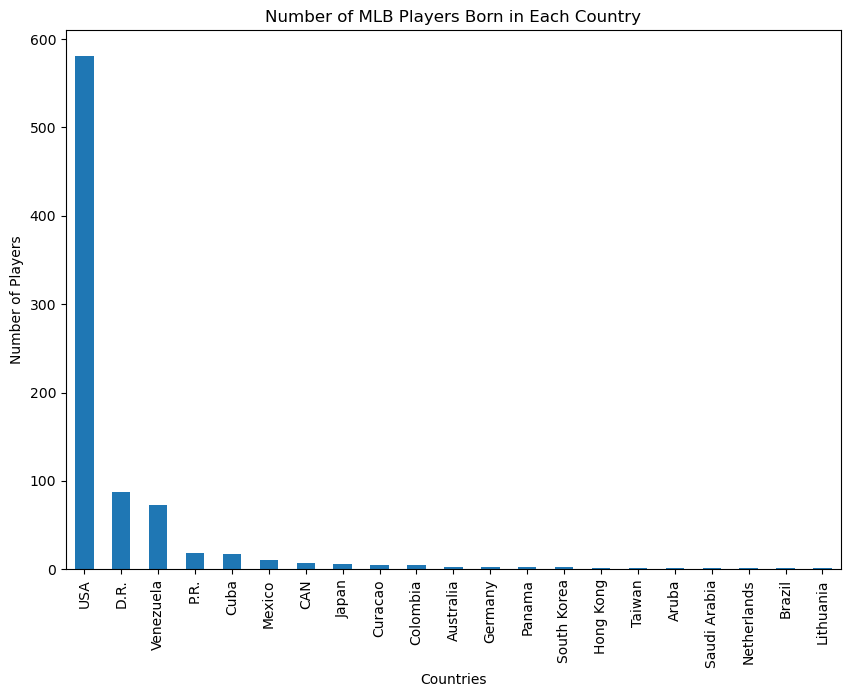

In [59]:
player_number_per_country = players['birth_country'].value_counts().plot(
    kind='bar', 
    xlabel='Countries',
    ylabel='Number of Players',
    figsize=(10,7),
    title='Number of MLB Players Born in Each Country'
    )

In [60]:
games

,g_id,home_team,away_team,date,home_final_score,away_final_score,start_time,venue_name,umpire_1B,umpire_2B,umpire_3B,umpire_HP,weather,wind,attendance,elapsed_time,delay,season
0,201800050,CIN,WAS,2018-04-01,5,6,4:10 PM,Great American Ball Park,James Hoye,Jeff Kellogg,Quinn Wolcott,Marvin Hudson,"50 degrees, partly cloudy","8 mph, L to R",10355,167,0,2018
1,201800073,NYA,TBA,2018-04-03,11,4,4:19 PM,Yankee Stadium,Joe West,Doug Eddings,Marty Foster,Mark Ripperger,"40 degrees, overcast","7 mph, In from CF",46776,209,0,2018
2,201800099,COL,ATL,2018-04-06,3,8,3:11 PM,Coors Field,Bill Welke,Tony Randazzo,Lance Barrett,Nic Lentz,"27 degrees, snow","4 mph, R to L",48216,176,61,2018
3,201800115,PHI,MIA,2018-04-07,20,1,6:08 PM,Citizens Bank Park,Carlos Torres,Kerwin Danley,Paul Nauert,Scott Barry,"46 degrees, cloudy","5 mph, In from CF",33660,201,0,2018
4,201800122,SLN,ARI,2018-04-08,1,4,1:15 PM,Busch Stadium,Rob Drake,Mike Muchlinski,Mike Winters,Tim Timmons,"41 degrees, clear","7 mph, R to L",40468,173,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,201802398,COL,WAS,2018-09-28,5,2,6:11 PM,Coors Field,Larry Vanover,Hunter Wendelstedt,Chris Guccione,David Rackley,"51 degrees, partly cloudy","7 mph, R to L",48089,171,0,2018
96,201802401,MIN,CHA,2018-09-29,8,3,6:10 PM,Target Field,Jim Reynolds,Mark Wegner,John Tumpane,John Libka,"47 degrees, overcast","9 mph, In from CF",32717,200,0,2018
97,201802402,KCA,CLE,2018-09-29,9,4,6:16 PM,Kauffman Stadium,Bruce Dreckman,Chad Fairchild,Kerwin Danley,Mike Estabrook,"72 degrees, cloudy","5 mph, R to L",23324,187,0,2018
98,201802421,SFN,LAN,2018-09-30,0,15,12:06 PM,AT&T Park,Pat Hoberg,Ed Hickox,Gerry Davis,Todd Tichenor,"68 degrees, partly cloudy","7 mph, Out to CF",41280,167,0,2018


In [61]:
# Dropping season column since it's not needed.
games.drop(columns=['season'], inplace=True)